### 1. Merge Datasets and Effectively Link information - Useful information for this project will come from disparate datasets. You will need to effectively merge them into a single dataframe for analysis

In [1]:
# import libraries 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# import the data 

# brands, months, total units, vs prior period
dataunits = pd.read_csv('data/BrandTotalUnits.csv')
# months, brands, total sales
datasales = pd.read_csv('data/BrandTotalSales.csv')
# brand, months, ARP, vs prior period
dataretail = pd.read_csv('data/BrandAverageRetailPrice.csv')
# State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,
# Brand,Product Description,Total Sales ($),Total Units,ARP,Flavor,Items Per Pack,
# Item Weight,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,
# Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
datadetails = pd.read_csv('data/BrandDetails.csv')

In [2]:
dataunits = dataunits.rename(columns={"vs. Prior Period": "vs. Prior Period (Units)"})

In [3]:
dataunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brands                    27686 non-null  object 
 1   Months                    27686 non-null  object 
 2   Total Units               25712 non-null  object 
 3   vs. Prior Period (Units)  24935 non-null  float64
dtypes: float64(1), object(3)
memory usage: 865.3+ KB


In [4]:
#First convert our months to datetime
dataunits['Months'] = pd.to_datetime(dataunits['Months'])

#Total units is too large currently to convert to a float
#need to trim it first, remove non-numeric characters then convert to float
dataunits['Total Units'] = dataunits['Total Units'].str[:8]
dataunits['Total Units'] = dataunits['Total Units'].str.replace(',', '').astype(float)

dataunits['Total Units'] = pd.to_numeric(dataunits['Total Units'])

dataunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Brands                    27686 non-null  object        
 1   Months                    27686 non-null  datetime64[ns]
 2   Total Units               25712 non-null  float64       
 3   vs. Prior Period (Units)  24935 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 865.3+ KB


In [5]:
datasales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Months           25279 non-null  object
 1   Brand            25279 non-null  object
 2   Total Sales ($)  25279 non-null  object
dtypes: object(3)
memory usage: 592.6+ KB


In [6]:
#First convert our months to datetime
datasales['Months'] = pd.to_datetime(datasales['Months'])
#Total units is too large currently to convert to a float
#need to trim it first then convert to float
datasales['Total Sales ($)'] = datasales['Total Sales ($)'].str[:8]
datasales['Total Sales ($)'] = datasales['Total Sales ($)'].str.replace(',', '')
datasales['Total Sales ($)'] = pd.to_numeric(datasales['Total Sales ($)'])


datasales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Months           25279 non-null  datetime64[ns]
 1   Brand            25279 non-null  object        
 2   Total Sales ($)  25279 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 592.6+ KB


In [7]:
dataretail = dataretail.rename(columns={"vs. Prior Period": "vs. Prior Period (ARP)"})

In [8]:
dataretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27211 entries, 0 to 27210
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brands                  27211 non-null  object 
 1   Months                  27211 non-null  object 
 2   ARP                     25279 non-null  float64
 3   vs. Prior Period (ARP)  24499 non-null  float64
dtypes: float64(2), object(2)
memory usage: 850.5+ KB


In [9]:
#First convert our months to datetime
dataretail['Months'] = pd.to_datetime(dataretail['Months'])

dataretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27211 entries, 0 to 27210
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Brands                  27211 non-null  object        
 1   Months                  27211 non-null  datetime64[ns]
 2   ARP                     25279 non-null  float64       
 3   vs. Prior Period (ARP)  24499 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 850.5+ KB


### 2. Develop basic Time Series Feature Extraction Plan - develop a series of standard timeseries features to augment your dataset and enable timeseries predictive models.

In [10]:
brands = dataunits["Brands"].unique()
brands

array(['#BlackSeries', '101 Cannabis Co.', '10x Infused', ..., 'Zlixir',
       'Zoma', 'Zuma Topicals'], dtype=object)

In [11]:
data = pd.DataFrame()

for brand in brands:
    units = dataunits[dataunits.Brands == brand]
    units.loc[:,'Previous Month (Units)'] = units.loc[:,'Total Units'].shift(1)
    units.loc[:,'Rolling Average (Units)'] = (units.loc[:,'Total Units'].shift(1) + units.loc[:,'Total Units'].shift(2) + units.loc[:,'Total Units'].shift(3))/3
    units.loc[(np.isnan(units["Rolling Average (Units)"])), "Rolling Average (Units)"] = (units.loc[:,'Total Units'].shift(1) + units.loc[:,'Total Units'].shift(2))/2
    units.loc[(np.isnan(units["Rolling Average (Units)"])), "Rolling Average (Units)"] = units.loc[:,'Total Units'].shift(1)
    units.loc[(np.isnan(units["Rolling Average (Units)"])), "Rolling Average (Units)"] = 0
    retail = dataretail[dataretail.Brands == brand]
    retail.loc[:,'Previous Month (ARP)'] = retail.loc[:,'ARP'].shift(1)
    retail.loc[:,'Rolling Average (ARP)'] = (retail.loc[:,'ARP'].shift(1) + retail.loc[:,'ARP'].shift(2) + retail.loc[:,'ARP'].shift(3))/3
    retail.loc[(np.isnan(retail["Rolling Average (ARP)"])), "Rolling Average (ARP)"] = (retail.loc[:,'ARP'].shift(1) + retail.loc[:,'ARP'].shift(2))/2
    retail.loc[(np.isnan(retail["Rolling Average (ARP)"])), "Rolling Average (ARP)"] = retail.loc[:,'ARP'].shift(1)
    retail.loc[(np.isnan(retail["Rolling Average (ARP)"])), "Rolling Average (ARP)"] = 0
    retail['Avg ARP'] = np.nansum(retail['ARP'])/np.count_nonzero(~np.isnan(retail['ARP']))
    sales = datasales[datasales.Brand == brand]
    sales.loc[:,'Previous Month Sales'] = sales.loc[:,'Total Sales ($)'].shift(1)
    sales.loc[:,'vs. Prior Period (Sales)'] = (sales.loc[:,'Total Sales ($)'] - sales.loc[:,'Total Sales ($)'].shift(1))/sales.loc[:,'Total Sales ($)'].shift(1)
    sales.loc[:,'Rolling Average Sales'] = (sales.loc[:,'Total Sales ($)'].shift(1) + sales.loc[:,'Total Sales ($)'].shift(2) + sales.loc[:,'Total Sales ($)'].shift(3))/3
    sales.loc[(np.isnan(sales["Rolling Average Sales"])), "Rolling Average Sales"] = (sales.loc[:,'Total Sales ($)'].shift(1) + sales.loc[:,'Total Sales ($)'].shift(2))/2
    sales.loc[(np.isnan(sales["Rolling Average Sales"])), "Rolling Average Sales"] = sales.loc[:,'Total Sales ($)'].shift(1)
    sales.loc[(np.isnan(sales["Rolling Average Sales"])), "Rolling Average Sales"] = 0
    sales = sales.merge(retail, left_on='Months', right_on='Months')
    sales = sales.drop('Brands', axis=1)
    units = units.merge(sales, left_on='Months', right_on='Months')
    units = units.drop('Brand', axis=1)
    details = datadetails[datadetails.Brand == brand]
    value = 0
    value1 = 0
    if 'Inhaleables' in details['Category L1'].values:
        value = 1
    if 'Edibles' in details['Category L1'].values:
        value1 = 1
    units['Inhaleables'] = value
    units['Edible'] = value1
    productcount = (details.Brand == brand).count()
    units["ProdCount"] = productcount
    data = data.append(units)
    data["Season"] = -(data['Months'].dt.month // -3)

data.head(20)

/Users/hannaco/Library/Python/3.9/lib/python/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/hannaco/Library/Python/3.9/lib/python/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/hannaco/Library/Python/3.9/lib/python/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Brands,Months,Total Units,vs. Prior Period (Units),Previous Month (Units),Rolling Average (Units),Total Sales ($),Previous Month Sales,vs. Prior Period (Sales),Rolling Average Sales,ARP,vs. Prior Period (ARP),Previous Month (ARP),Rolling Average (ARP),Avg ARP,Inhaleables,Edible,ProdCount,Season
0,#BlackSeries,2020-08-01,1616.3300,NaN,NaN,0.000000,25352.10,NaN,NaN,0.000000,15.684913,NaN,NaN,0.000000,13.723174,1,0,4,3
1,#BlackSeries,2021-01-01,715.5328,NaN,NaN,0.000000,9739.42,25352.10,-0.615834,25352.100000,13.611428,NaN,NaN,0.000000,13.723174,1,0,4,1
2,#BlackSeries,2021-02-01,766.6691,0.071466,715.5328,715.532800,9102.80,9739.42,-0.065365,17545.760000,11.873182,-0.127705,13.611428,13.611428,13.723174,1,0,4,1
0,101 Cannabis Co.,2019-11-01,131.0677,NaN,NaN,0.000000,4465.04,NaN,NaN,0.000000,34.066667,NaN,NaN,0.000000,32.792343,1,0,77,4
1,101 Cannabis Co.,2020-01-01,345.4134,NaN,NaN,0.000000,11790.60,4465.04,1.640648,4465.040000,34.134929,NaN,NaN,0.000000,32.792343,1,0,77,1
2,101 Cannabis Co.,2020-02-01,696.6584,1.016883,345.4134,345.413400,20266.70,11790.60,0.718886,8127.820000,29.091388,-0.147753,34.134929,34.134929,32.792343,1,0,77,1
3,101 Cannabis Co.,2020-03-01,943.3933,0.354169,696.6584,521.035900,30465.40,20266.70,0.503225,12174.113333,32.293498,0.110071,29.091388,31.613159,32.792343,1,0,77,1
4,101 Cannabis Co.,2020-04-01,712.4981,-0.244750,943.3933,661.821700,23465.60,30465.40,-0.229762,20840.900000,32.934344,0.019844,32.293498,31.839939,32.792343,1,0,77,2
5,101 Cannabis Co.,2020-05-01,619.8410,-0.130045,712.4981,784.183267,21348.30,23465.60,-0.090230,24732.566667,34.441725,0.045769,32.934344,31.439744,32.792343,1,0,77,2
6,101 Cannabis Co.,2020-06-01,426.1504,-0.312484,619.8410,758.577467,14111.70,21348.30,-0.338978,25093.100000,33.114497,-0.038535,34.441725,33.223189,32.792343,1,0,77,2


### 3. Create additional data feature engineering plan and implement it (no need to pipeline this) Determine and execute a plan to fully pre-process your data for modeling and then execute it.
#### Specifically:
    1. Determine which fields to retain and which to drop.
    2. For those you retain, determine a categorization strategy
    3. Determine an imputation strategy (you should choose more than one imputation method depending on the specifics of your data
    4. Augment at least one feature, ideally a feature cross, or non-linear transition e. Determine a strategy for scaling features

In [12]:
# drop vs prior period and previous months for units and arp
data = data.drop("Previous Month (Units)", axis=1)
data = data.drop("Previous Month (ARP)", axis=1)

# get year from Months
data['Year'] = data['Months'].dt.year

data.head()

,Brands,Months,Total Units,vs. Prior Period (Units),Rolling Average (Units),Total Sales ($),Previous Month Sales,vs. Prior Period (Sales),Rolling Average Sales,ARP,vs. Prior Period (ARP),Rolling Average (ARP),Avg ARP,Inhaleables,Edible,ProdCount,Season,Year
0,#BlackSeries,2020-08-01,1616.3300,NaN,0.0000,25352.10,NaN,NaN,0.00,15.684913,NaN,0.000000,13.723174,1,0,4,3,2020
1,#BlackSeries,2021-01-01,715.5328,NaN,0.0000,9739.42,25352.10,-0.615834,25352.10,13.611428,NaN,0.000000,13.723174,1,0,4,1,2021
2,#BlackSeries,2021-02-01,766.6691,0.071466,715.5328,9102.80,9739.42,-0.065365,17545.76,11.873182,-0.127705,13.611428,13.723174,1,0,4,1,2021
0,101 Cannabis Co.,2019-11-01,131.0677,NaN,0.0000,4465.04,NaN,NaN,0.00,34.066667,NaN,0.000000,32.792343,1,0,77,4,2019
1,101 Cannabis Co.,2020-01-01,345.4134,NaN,0.0000,11790.60,4465.04,1.640648,4465.04,34.134929,NaN,0.000000,32.792343,1,0,77,1,2020


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 3
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Brands                    25279 non-null  object        
 1   Months                    25279 non-null  datetime64[ns]
 2   Total Units               25279 non-null  float64       
 3   vs. Prior Period (Units)  22961 non-null  float64       
 4   Rolling Average (Units)   25279 non-null  float64       
 5   Total Sales ($)           25279 non-null  float64       
 6   Previous Month Sales      23652 non-null  float64       
 7   vs. Prior Period (Sales)  23652 non-null  float64       
 8   Rolling Average Sales     25279 non-null  float64       
 9   ARP                       25279 non-null  float64       
 10  vs. Prior Period (ARP)    22570 non-null  float64       
 11  Rolling Average (ARP)     25279 non-null  float64       
 12  Avg ARP               

In [14]:
# sort dataframe by ARP
averages = np.array(data["Avg ARP"])
averages.sort()
splits = np.array_split(averages,20)

data['Brand'] = np.nan

# we will categorize our brands based off their average retail price
# this is done based on how brands for other goods are often split into tiers based on their prices 
# (e.g., luxury vs affordable clothing, generic vs name brand)

i = 0

for l in splits:
    data.loc[(data['Avg ARP'] >= l[0]) & (data['Avg ARP'] <= l[-1]) , "Brand"] = i
    i = i + 1

data['Brand'] = data['Brand'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 3
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Brands                    25279 non-null  object        
 1   Months                    25279 non-null  datetime64[ns]
 2   Total Units               25279 non-null  float64       
 3   vs. Prior Period (Units)  22961 non-null  float64       
 4   Rolling Average (Units)   25279 non-null  float64       
 5   Total Sales ($)           25279 non-null  float64       
 6   Previous Month Sales      23652 non-null  float64       
 7   vs. Prior Period (Sales)  23652 non-null  float64       
 8   Rolling Average Sales     25279 non-null  float64       
 9   ARP                       25279 non-null  float64       
 10  vs. Prior Period (ARP)    22570 non-null  float64       
 11  Rolling Average (ARP)     25279 non-null  float64       
 12  Avg ARP               

In [15]:
# since we've encoded Brands, we can drop it
data = data.drop('Brands', axis=1)
# we can also drop Months since we've extracted what we want from it
data = data.drop('Months', axis=1)

data['Previous Month Sales / Rolling Avg Sales'] = data['Previous Month Sales']/data['Rolling Average Sales']
data = data.drop('Previous Month Sales', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 3
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Units                               25279 non-null  float64
 1   vs. Prior Period (Units)                  22961 non-null  float64
 2   Rolling Average (Units)                   25279 non-null  float64
 3   Total Sales ($)                           25279 non-null  float64
 4   vs. Prior Period (Sales)                  23652 non-null  float64
 5   Rolling Average Sales                     25279 non-null  float64
 6   ARP                                       25279 non-null  float64
 7   vs. Prior Period (ARP)                    22570 non-null  float64
 8   Rolling Average (ARP)                     25279 non-null  float64
 9   Avg ARP                                   25279 non-null  float64
 10  Inhaleables                           

In [16]:
# for vs Prior Period, we can make it zero because there is no prior period to compare to
data['vs. Prior Period (Units)'] = data['vs. Prior Period (Units)'].replace(np.nan, 0)
data['vs. Prior Period (ARP)'] = data['vs. Prior Period (ARP)'].replace(np.nan, 0)
data['vs. Prior Period (Sales)'] = data['vs. Prior Period (Sales)'].replace(np.nan, 0)
data['Previous Month Sales / Rolling Avg Sales'] = data['Previous Month Sales / Rolling Avg Sales'].replace(np.nan, 0)
data['vs. Prior Period (Sales)'] = data['vs. Prior Period (Sales)'].replace(np.inf, 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25279 entries, 0 to 3
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Units                               25279 non-null  float64
 1   vs. Prior Period (Units)                  25279 non-null  float64
 2   Rolling Average (Units)                   25279 non-null  float64
 3   Total Sales ($)                           25279 non-null  float64
 4   vs. Prior Period (Sales)                  25279 non-null  float64
 5   Rolling Average Sales                     25279 non-null  float64
 6   ARP                                       25279 non-null  float64
 7   vs. Prior Period (ARP)                    25279 non-null  float64
 8   Rolling Average (ARP)                     25279 non-null  float64
 9   Avg ARP                                   25279 non-null  float64
 10  Inhaleables                           

In [17]:
data.corr()

,Total Units,vs. Prior Period (Units),Rolling Average (Units),Total Sales ($),vs. Prior Period (Sales),Rolling Average Sales,ARP,vs. Prior Period (ARP),Rolling Average (ARP),Avg ARP,Inhaleables,Edible,ProdCount,Season,Year,Brand,Previous Month Sales / Rolling Avg Sales
Total Units,1.000000,-0.007556,0.965384,0.381529,-0.008012,0.390149,-0.135363,-0.022333,-0.103616,-0.133139,0.182136,NaN,0.411509,0.003090,0.021751,-0.176250,0.056426
vs. Prior Period (Units),-0.007556,1.000000,-0.034722,0.004132,0.284571,-0.059044,-0.036533,-0.071759,0.012681,-0.022293,0.029805,NaN,-0.010919,-0.001281,-0.014845,-0.024619,-0.078395
Rolling Average (Units),0.965384,-0.034722,1.000000,0.367438,-0.015554,0.399790,-0.129445,-0.001701,-0.100945,-0.130903,0.178062,NaN,0.410527,0.008369,0.025279,-0.172763,0.043161
Total Sales ($),0.381529,0.004132,0.367438,1.000000,0.011670,0.808954,-0.057710,-0.024009,0.004944,-0.055109,0.258003,NaN,0.280689,-0.002127,-0.049529,-0.025734,0.164555
vs. Prior Period (Sales),-0.008012,0.284571,-0.015554,0.011670,1.000000,-0.037048,-0.020898,0.132902,-0.028064,-0.022250,0.024019,NaN,-0.008449,0.002789,0.002003,-0.030991,-0.052251
Rolling Average Sales,0.390149,-0.059044,0.399790,0.808954,-0.037048,1.000000,-0.056073,-0.012126,0.033795,-0.053261,0.258400,NaN,0.290644,-0.000507,-0.009633,-0.020731,0.115449
ARP,-0.135363,-0.036533,-0.129445,-0.057710,-0.020898,-0.056073,1.000000,0.083487,0.761152,0.930874,-0.087343,NaN,0.090456,0.011521,-0.094783,0.723601,-0.021635
vs. Prior Period (ARP),-0.022333,-0.071759,-0.001701,-0.024009,0.132902,-0.012126,0.083487,1.000000,-0.056010,-0.003541,0.005477,NaN,-0.009093,-0.015789,0.006948,-0.005439,-0.003696
Rolling Average (ARP),-0.103616,0.012681,-0.100945,0.004944,-0.028064,0.033795,0.761152,-0.056010,1.000000,0.747392,-0.055423,NaN,0.125334,-0.000215,-0.034714,0.704868,0.173635
Avg ARP,-0.133139,-0.022293,-0.130903,-0.055109,-0.022250,-0.053261,0.930874,-0.003541,0.747392,1.000000,-0.093829,NaN,0.097174,0.008123,-0.051811,0.777335,-0.008466


In [18]:
data_y = data['Total Sales ($)']
data = data.drop('Total Sales ($)', axis=1)
data_train, data_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, random_state=42)

### 4. Implement a basic Linear Regression predictive model for statistical hypothesis testing - With your newly pipelined data, find and interpret important features (e.g. using regression and associated p-values). If there are any collinearities be careful when incorporating them into the regression.

In [19]:
# train a linear regression model

lin_reg = sm.OLS(y_train,data_train).fit()
print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:        Total Sales ($)   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              4473.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        02:23:09   Log-Likelihood:                     -2.3048e+05
No. Observations:               17695   AIC:                                  4.610e+05
Df Residuals:                   17680   BIC:                                  4.611e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [20]:
test_pred = lin_reg.predict(data_test)
rmse = mean_squared_error(y_test, test_pred, squared=False)
r2 = metrics.r2_score(y_test, test_pred)
print('R-squared score:', r2)
print("Root Mean Squared Error:", rmse)

R-squared score: 0.6762080802854256
Root Mean Squared Error: 107421.23066133518


For feature importance, we consider a feature to be important if the p-vlaue is less than 0.05. From the summary printed above, we see that Rolling Average (Units), vs. Prior Period (Sales), vs. Prior Period (ARP), Rolling Average (ARP), Average ARP, Inhaleables, ProdCount, Season, Year, and Brand all have a p-value greater than 0.05. This indicates that they are not significant features when it comes to predicting total sales.

### 5. (Extra Credit): Implement Principle Component Analysis (PCA) - Since your resulting dataframe is likely to be high-dimensionality, employ PCA to reduce the complexity of your dataframe. Test the effect of different levels of principle components on your linear model and see if you can optimize performance. Note: since we haven’t covered this in class. This action item will be extra credit.

### 6. Employ an ensemble method to your predictive model exercise - Leverage an ensemble learning method to generate an optimized prediction model

In [21]:
# e.g. bagging classifier, knnclassifier
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(base_estimator=LinearRegression()).fit(data_train, y_train)
ensemble_test_pred = bagging.predict(data_test)
ensemble_rmse = mean_squared_error(y_test, ensemble_test_pred, squared=False)
r2 = metrics.r2_score(y_test, ensemble_test_pred)
print('R-squared score:', r2)
print("Root Mean Squared Error:", ensemble_rmse)

R-squared score: 0.6818957909756592
Root Mean Squared Error: 106473.57294312787


### 7. Cross-Validate your training results - Employ K-Fold Cross-validation to your training regimen for both ensemble and single regression models. (Optional: employ a stratifiedshufflesplit as well to ensure equitable distribution along a key parameter)

In [22]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
lr = LinearRegression()
bg = BaggingRegressor()
sc_lr = cross_validate(lr, data, data_y, scoring=("r2"), cv=kf, n_jobs=-1)
print("R squared for Linear Regression:" + str(sum(sc_lr['test_score'])/10))

sc_bg = cross_validate(bg, data, data_y, scoring=("r2"), cv=kf, n_jobs=-1)
print("R squared for Bagging Regressor:" + str(sum(sc_bg['test_score'])/10))

R squared for Linear Regression:0.6766746608915497
R squared for Bagging Regressor:0.9824293106010616


### 8. Employ a GridSearch method to optimize your parameters - Leverage gridsearch or an equivalent parameter tuning approach to optimize parameters to your predictive model (Note: you can likely merge the gridsearch and cross-validation steps into one single run!)

In [23]:
bg = BaggingRegressor()
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=20)]
max_samples = [int(x) for x in np.linspace(1, 25, num = 20)] 
bootstrap = [True, False]
random_grid = {
'n_estimators': n_estimators,
'max_samples': max_samples,
'bootstrap': bootstrap
}
grid = GridSearchCV(bg, random_grid)
grid.fit(data_train, y_train)
print ('Best Parameters: ', grid.best_params_, ' \n')

Best Parameters:  {'bootstrap': True, 'max_samples': 25, 'n_estimators': 85}  



### 9. Experiment with your own custom models and report out your highest performing model - For this part of the project you have free range to employ any of the tools you’ve learned in class, along with any additional tools or techniques you research independently to see how you can do.

In [24]:
RFR = RandomForestRegressor(n_estimators=100, max_depth=5, max_features=2)
RFR.fit(data_train, y_train)

y_pred = RFR.predict(data_test)
r2 = metrics.r2_score(y_test, y_pred)
rfr_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rfr_rmse)
print('R-squared score:', r2)

Root Mean Squared Error: 94390.10810734975
R-squared score: 0.7500007380142818


Feature: 0, Score: 0.25495
Feature: 1, Score: 0.02092
Feature: 2, Score: 0.15812
Feature: 3, Score: 0.04546
Feature: 4, Score: 0.34167
Feature: 5, Score: 0.00937
Feature: 6, Score: 0.00258
Feature: 7, Score: 0.01626
Feature: 8, Score: 0.01047
Feature: 9, Score: 0.02246
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.09055
Feature: 12, Score: 0.00028
Feature: 13, Score: 0.00191
Feature: 14, Score: 0.00651
Feature: 15, Score: 0.01848


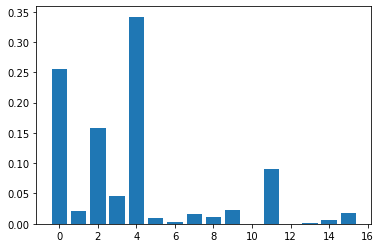

In [25]:
importance = RFR.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
rfr = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=20)]
max_samples = [int(x) for x in np.linspace(1, 25, num = 20)] 
bootstrap = [True, False]
random_grid = {
'n_estimators': n_estimators,
'max_samples': max_samples,
'bootstrap': bootstrap
}
grid = GridSearchCV(rfr, random_grid)
grid.fit(data_train, y_train)
print ('Best Parameters: ', grid.best_params_, ' \n')

Best Parameters:  {'bootstrap': True, 'max_samples': 25, 'n_estimators': 76}  



/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/opt/

In [29]:
bagging_grid = BaggingRegressor(base_estimator=LinearRegression(), bootstrap=True, max_samples=25, n_estimators=85).fit(data_train, y_train)
ensemble_test_pred_grid = bagging_grid.predict(data_test)
ensemble_rmse_grid = mean_squared_error(y_test, ensemble_test_pred_grid, squared=False)
r2 = metrics.r2_score(y_test, ensemble_test_pred_grid)
print('R-squared score:', r2)
print("Root Mean Squared Error:", ensemble_rmse_grid)

R-squared score: -1.1501271353510663
Root Mean Squared Error: 276814.7261699921


In [30]:
RFR_grid = RandomForestRegressor(bootstrap=True, max_samples=25, n_estimators=76)
RFR_grid.fit(data_train, y_train)

y_pred_grid = RFR_grid.predict(data_test)
r2_grid = metrics.r2_score(y_test, y_pred_grid)
rfr_rmse_grid = mean_squared_error(y_test, y_pred_grid, squared=False)
print("Root Mean Squared Error:", rfr_rmse_grid)
print('R-squared score:', r2_grid)

Root Mean Squared Error: 97789.43523882226
R-squared score: 0.7316697498389482
